In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 

import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler



In [43]:
data = pd.read_csv("lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [44]:
data.shape


(396030, 27)

In [45]:
data.describe()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<Axes: ylabel='count'>

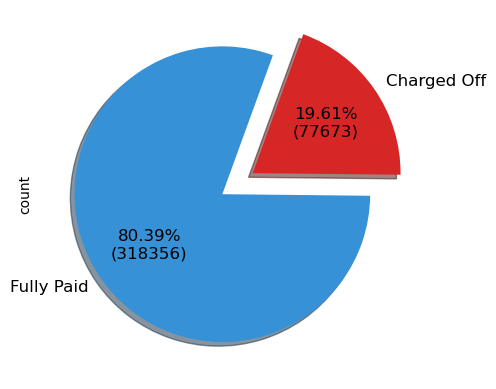

In [47]:
def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return f"{pct:.2f}%\n({absolute:d})"

colors = ["#3791D7", "#D72626"]
data["loan_status"].value_counts().plot.pie(explode=[0,0.25], shadow=True, colors=colors, 
                                             fontsize=12, startangle=70,
                                           autopct=lambda pct: func(pct, data["loan_status"].value_counts()),)

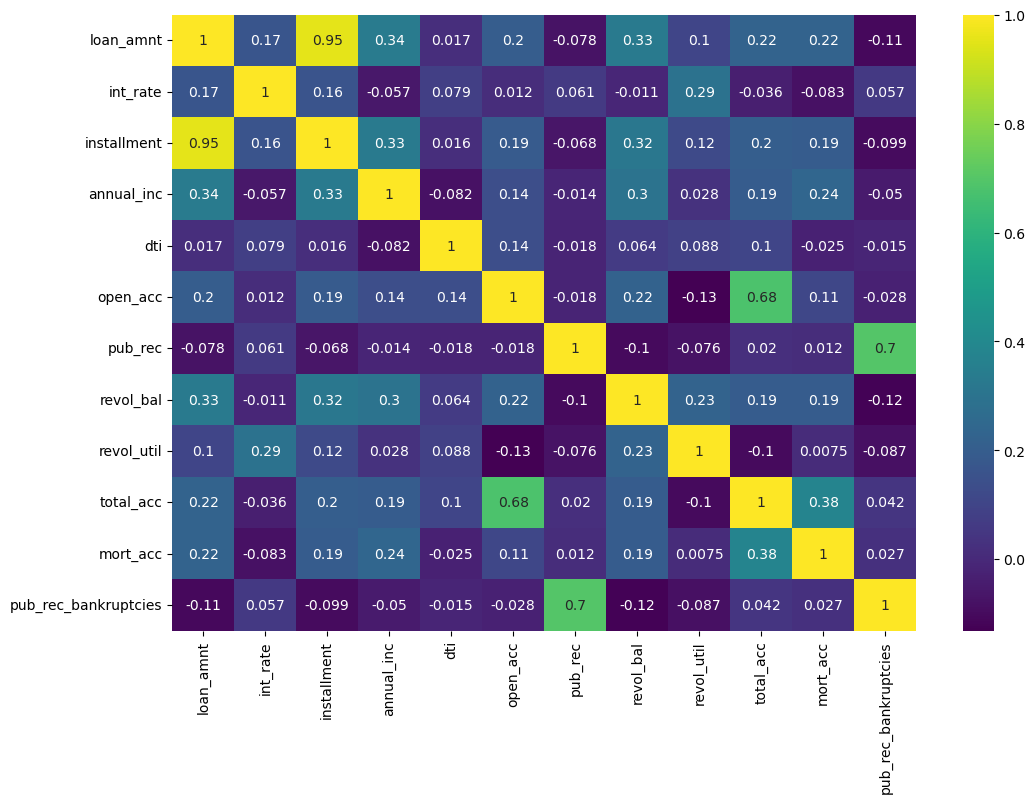

In [48]:
numeric_data = data.select_dtypes(include=[np.number])

# Plot heatmap with only numeric data
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
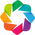

:Layout
   .NdOverlay.I :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)
   .Bars.I      :Bars   [loan_amnt_bin,loan_status]   (value)

In [49]:
import holoviews as hv
import hvplot.pandas

hv.extension('bokeh')

loan_amnt_hist = data.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top_right'
)


bins = [0, 10000, 20000, 30000, 40000]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k']

data['loan_amnt_bin'] = pd.cut(data['loan_amnt'], bins=bins, labels=labels, include_lowest=True)

data['loan_amnt_bin'] = pd.Categorical(data['loan_amnt_bin'], categories=labels, ordered=True)


grouped = data.groupby(['loan_amnt_bin', 'loan_status']).size().reset_index(name='counts')

grouped['total_counts'] = grouped.groupby('loan_amnt_bin')['counts'].transform('sum')
grouped['percentage'] = grouped['counts'] / grouped['total_counts'] * 100


pivoted = grouped.pivot(index='loan_amnt_bin', columns='loan_status', values='percentage').fillna(0)

pivoted = pivoted[['Fully Paid', 'Charged Off']]


colors = {'Fully Paid': '#FEB9AC', 'Charged Off': '#ACDAF0'}
stacked_bar = pivoted.hvplot.bar(
    stacked=True,
    xlabel='Loan Amount', 
    ylabel='Percentage (%)',
    title="Percentage of Loan Status by Loan Amount",
    width=400, 
    height=400,
    color=[colors[status] for status in pivoted.columns]
)



combined_plot = (loan_amnt_hist + stacked_bar).opts(
    hv.opts.Layout(shared_axes=True), 
    hv.opts.Bars(xrotation=45),  # Rotate x-axis labels for better readability
)

combined_plot


In [52]:
grouped_data = (
    data.groupby(['grade', 'loan_status'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['loan_status'], ascending=False)
)

def calculate_percentages(grouped_data):
  """Calculates the percentage of 'Charged Off' loans for each grade"""
  total_loans = grouped_data.groupby('grade')['count'].sum()
  percentage_charged_off = (
      grouped_data[grouped_data['loan_status'] == 'Charged Off'].set_index('grade')['count'] / total_loans
  ) * 100
  return percentage_charged_off.round(1).reset_index(name='percentage')


percentages = calculate_percentages(grouped_data.copy())


merged_data = grouped_data.merge(percentages, on='grade')

merged_data["percentage"] = merged_data["percentage"].apply(lambda x: str(x) + "%")


bar_chart = merged_data.hvplot.bar(
    x='grade',
    y='count',
    by='loan_status',
    stacked=True,
    title='Loan Status by Grade',
).opts(
    legend_position="top_right",
    tools=["hover"],
    width=600,
    height=400
)


text_labels = hv.Labels(merged_data[merged_data["loan_status"]=="Fully Paid"], kdims=['grade', 'count'], vdims='percentage').opts(
    text_font_size='10pt',
    text_color='black',
    text_align='center',
    text_baseline='bottom'
)


final_plot = bar_chart * text_labels


final_plot

:Overlay
   .Bars.I   :Bars   [grade,loan_status]   (count)
   .Labels.I :Labels   [grade,count]   (percentage)

In [53]:
grouped_data_subgrade = (
    data.groupby(['sub_grade', 'loan_status'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['sub_grade', 'loan_status'], ascending=[True, False])
)

def calculate_percentages(grouped_data, bygrade="grade"):
  """Calculates the percentage of 'Charged Off' loans for each grade"""
  total_loans = grouped_data.groupby(bygrade)['count'].sum()
  percentage_charged_off = (
      grouped_data[grouped_data['loan_status'] == 'Charged Off'].set_index(bygrade)['count'] / total_loans
  ) * 100
  return percentage_charged_off.round(1).reset_index(name='percentage')


percentages = calculate_percentages(grouped_data_subgrade.copy(), bygrade="sub_grade")


merged_data = grouped_data_subgrade.merge(percentages, on='sub_grade')

merged_data["percentage"] = merged_data["percentage"].apply(lambda x: str(int(x)) + "%")
bar_chart = merged_data.hvplot.bar(
    x='sub_grade',
    y='count',
    by='loan_status',
    stacked=True,
    title='Loan Status by Sub-grade',
).opts(
    legend_position="top_right",
    tools=["hover"],
    width=1000,
    height=500
)


text_labels = hv.Labels(merged_data[merged_data["loan_status"]=="Fully Paid"], kdims=['sub_grade', 'count'], vdims='percentage').opts(
    text_font_size='8pt',
    text_color='black',
    text_align='center',
    text_baseline='bottom'
)
final_plot = bar_chart * text_labels


final_plot

:Overlay
   .Bars.I   :Bars   [sub_grade,loan_status]   (count)
   .Labels.I :Labels   [sub_grade,count]   (percentage)

In [54]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [55]:
grouped_data_homeownership = (
    data.groupby(['home_ownership', 'loan_status'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['count', 'loan_status'], ascending=[False, False])
)

def calculate_percentages(grouped_data, bygrade="grade"):
  """Calculates the percentage of 'Charged Off' loans for each grade"""
  total_loans = grouped_data.groupby(bygrade)['count'].sum()
  percentage_charged_off = (
      grouped_data[grouped_data['loan_status'] == 'Charged Off'].set_index(bygrade)['count'] / total_loans
  ) * 100
  return percentage_charged_off.round(1).reset_index(name='percentage')

# Calculate percentages
percentages = calculate_percentages(grouped_data_homeownership.copy(), bygrade="home_ownership")

merged_data = grouped_data_homeownership.merge(percentages, on='home_ownership')

merged_data["percentage"] = merged_data["percentage"].apply(lambda x: str(int(x)) + "%" if not np.isnan(x) else "")

# Create the bar chart with percentage labels
bar_chart = grouped_data_homeownership.hvplot.bar(
    x='home_ownership',
    y='count',
    by='loan_status',
    stacked=True,
    title='Loan Status by Types of Home Ownership',
).opts(
    legend_position="top_right",
    tools=["hover"],
    width=500,
    height=400
)

text_labels = hv.Labels(merged_data[merged_data["loan_status"]=="Fully Paid"], kdims=['home_ownership', 'count'], vdims='percentage').opts(
    text_font_size='8pt',
    text_color='black',
    text_align='center',
    text_baseline='bottom'
)


final_plot = bar_chart * text_labels


final_plot

:Overlay
   .Bars.I   :Bars   [home_ownership,loan_status]   (count)
   .Labels.I :Labels   [home_ownership,count]   (percentage)

In [56]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  

In [57]:
grouped_data_term = (
    data.groupby(['term', 'loan_status'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['count', 'loan_status'], ascending=[False, False])
)

def calculate_percentages(grouped_data, bygrade="grade"):
  """Calculates the percentage of 'Charged Off' loans for each grade"""
  total_loans = grouped_data.groupby(bygrade)['count'].sum()
  percentage_charged_off = (
      grouped_data[grouped_data['loan_status'] == 'Charged Off'].set_index(bygrade)['count'] / total_loans
  ) * 100
  return percentage_charged_off.round(1).reset_index(name='percentage')

# Calculate percentages
percentages = calculate_percentages(grouped_data_term.copy(), bygrade="term")

# Merge data with percentages for labeling
merged_data = grouped_data_term.merge(percentages, on='term')

merged_data["percentage"] = merged_data["percentage"].apply(lambda x: str(int(x)) + "%" if not np.isnan(x) else "")

# Create the bar chart with percentage labels
bar_chart = grouped_data_term.hvplot.bar(
    x='term',
    y='count',
    by='loan_status',
    stacked=True,
    title='Loan Status by Terms/Length of Loan',
).opts(
    legend_position="top_right",
    tools=["hover"],
    width=400,
    height=400
)


# Create text labels
text_labels = hv.Labels(merged_data[merged_data["loan_status"]=="Fully Paid"], 
                        kdims=['term', 'count'], vdims='percentage').opts(
    text_font_size='10pt',
    text_color='black',
    text_align='center',
    text_baseline='bottom'
)

# Combine bar chart and labels
final_plot = bar_chart * text_labels

# Display the chart
final_plot

:Overlay
   .Bars.I   :Bars   [term,loan_status]   (count)
   .Labels.I :Labels   [term,count]   (percentage)

In [58]:
xvar = "purpose"

# Group the data and sort by 'loan_status' (Charged Off on top)
grouped_data_xvar = (
    data.groupby([xvar, 'loan_status'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['count', 'loan_status'], ascending=[False, False])
)

# Calculate percentages
percentages = calculate_percentages(grouped_data_xvar.copy(), bygrade=xvar)

# Merge data with percentages for labeling
merged_data = grouped_data_xvar.merge(percentages, on=xvar)

merged_data["percentage"] = merged_data["percentage"].apply(lambda x: str(int(x)) + "%" if not np.isnan(x) else "")


# Create the bar chart with percentage labels
bar_chart = grouped_data_xvar.hvplot.bar(
    x=xvar,
    y='count',
    by='loan_status',
    stacked=True,
    title='Loan Status by Purpose of Borrowing',
).opts(
    legend_position="top_right",
    tools=["hover"],
    width=800,
    height=400,
    xrotation=45
)


# Create text labels
text_labels = hv.Labels(merged_data[merged_data["loan_status"]=="Fully Paid"], 
                        kdims=[xvar, 'count'], vdims='percentage').opts(
    text_font_size='10pt',
    text_color='black',
    text_align='center',
    text_baseline='bottom'
)

# Combine bar chart and labels
final_plot = bar_chart * text_labels

# Display the chart
final_plot


:Overlay
   .Bars.I   :Bars   [purpose,loan_status]   (count)
   .Labels.I :Labels   [purpose,count]   (percentage)

In [59]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

/var/folders/bb/q66wwsdn0v3bxzc8d7r009dr0000gn/T/ipykernel_36107/836848778.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])
/var/folders/bb/q66wwsdn0v3bxzc8d7r009dr0000gn/T/ipykernel_36107/836848778.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])


In [60]:
start_date = '1995-01-01'
end_date = '2003-12-31'

# Filter the DataFrame
data_earliest_cr_line_1995_2003 = data[(data['earliest_cr_line'] >= start_date) & (data['earliest_cr_line'] <= end_date)]

# Extract the year from the 'date' column
data_earliest_cr_line_1995_2003['earliest_cr_line_year'] = data_earliest_cr_line_1995_2003['earliest_cr_line'].dt.year.astype(str)

/var/folders/bb/q66wwsdn0v3bxzc8d7r009dr0000gn/T/ipykernel_36107/3129824350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_earliest_cr_line_1995_2003['earliest_cr_line_year'] = data_earliest_cr_line_1995_2003['earliest_cr_line'].dt.year.astype(str)


In [61]:
xvar = "earliest_cr_line_year"

# Group the data and sort by 'loan_status' (Charged Off on top)
grouped_data_xvar = (
    data_earliest_cr_line_1995_2003[~data_earliest_cr_line_1995_2003[xvar].isna()].groupby([xvar, 'loan_status'])
    .size()
    .reset_index(name='count')
    .sort_values(by=[xvar, 'loan_status'], ascending=[True, False])
)

year_order = [f"{year}" for year in sorted(data_earliest_cr_line_1995_2003[xvar].unique())]

# Convert 'grade' column to an ordered categorical type
grouped_data_xvar[xvar] = pd.Categorical(grouped_data_xvar[xvar], 
                                         categories=year_order, ordered=True)

grouped_data_xvar = grouped_data_xvar.sort_values(by=[xvar, 'loan_status'], 
                                                  ascending=[True, False])

# Calculate percentages
percentages = calculate_percentages(grouped_data_xvar.copy(), bygrade=xvar)

# Merge data with percentages for labeling
merged_data = grouped_data_xvar.merge(percentages, on=xvar)

merged_data["percentage"] = merged_data["percentage"].apply(lambda x: str(x) + "%" if not np.isnan(x) else "")


# Create the bar chart with percentage labels
bar_chart = grouped_data_xvar.hvplot.bar(
    x=xvar,
    y='count',
    by='loan_status',
    stacked=True,
    title='Loan Status by Date of Earliest Reported Credit Line Opened',
).opts(
    legend_position="top_left",
    tools=["hover"],
    width=800,
    height=400,
    xrotation=45
)


# Create text labels
text_labels = hv.Labels(merged_data[merged_data["loan_status"]=="Fully Paid"], 
                        kdims=[xvar, 'count'], vdims='percentage').opts(
    text_font_size='10pt',
    text_color='black',
    text_align='center',
    text_baseline='bottom'
)

# Combine bar chart and labels
final_plot = bar_chart * text_labels

# Display the chart
final_plot

:Overlay
   .Bars.I   :Bars   [earliest_cr_line_year,loan_status]   (count)
   .Labels.I :Labels   [earliest_cr_line_year,count]   (percentage)

In [62]:
start_open_acc = 8
end_open_acc = 15

# Filter the DataFrame
data_open_acc_8_15 = data[(data['open_acc'] >= start_open_acc) & (data['open_acc'] < end_open_acc)]

# Extract the year from the 'date' column
data_open_acc_8_15['open_acc'] = data_open_acc_8_15['open_acc'].astype(int).astype(str)

/var/folders/bb/q66wwsdn0v3bxzc8d7r009dr0000gn/T/ipykernel_36107/3537485179.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_open_acc_8_15['open_acc'] = data_open_acc_8_15['open_acc'].astype(int).astype(str)


In [63]:
xvar = "open_acc"

# Group the data and sort by 'loan_status' (Charged Off on top)
grouped_data_xvar = (
    data_open_acc_8_15[~data_open_acc_8_15[xvar].isna()].groupby([xvar, 'loan_status'])
    .size()
    .reset_index(name='count')
    .sort_values(by=[xvar, 'loan_status'], ascending=[True, False])
)

open_acc_order = [f"{open_acc}" for open_acc in range(start_open_acc, end_open_acc)]

# Convert 'grade' column to an ordered categorical type
grouped_data_xvar[xvar] = pd.Categorical(grouped_data_xvar[xvar], 
                                         categories=open_acc_order, ordered=True)

grouped_data_xvar = grouped_data_xvar.sort_values(by=[xvar, 'loan_status'], 
                                                  ascending=[True, False])

# Calculate percentages
percentages = calculate_percentages(grouped_data_xvar.copy(), bygrade=xvar)

# Merge data with percentages for labeling
merged_data = grouped_data_xvar.merge(percentages, on=xvar)

merged_data["percentage"] = merged_data["percentage"].apply(lambda x: str(x) + "%" if not np.isnan(x) else "")


# Create the bar chart with percentage labels
bar_chart = grouped_data_xvar.hvplot.bar(
    x=xvar,
    y='count',
    by='loan_status',
    stacked=True,
    title='Loan Status by Number of Open Credit Lines',
).opts(
    legend_position="top_right",
    tools=["hover"],
    width=600,
    height=400,
    xrotation=45,
    xlabel='Number of Open Credit Lines'
)


# Create text labels
text_labels = hv.Labels(merged_data[merged_data["loan_status"]=="Fully Paid"], 
                        kdims=[xvar, 'count'], vdims='percentage').opts(
    text_font_size='10pt',
    text_color='black',
    text_align='center',
    text_baseline='bottom'
)

# Combine bar chart and labels
final_plot = bar_chart * text_labels

# Display the chart
final_plot

:Overlay
   .Bars.I   :Bars   [open_acc,loan_status]   (count)
   .Labels.I :Labels   [open_acc,count]   (percentage)

In [64]:
data['loan_status_bool'] = data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [31]:
numeric_data = data.select_dtypes(include=[float, int])

numeric_data.corr()['loan_status_bool'].drop('loan_status_bool').sort_values().hvplot.barh(
    width=600, height=400, 
    title="Correlation between Loan status and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features', 
)

:Bars   [index]   (loan_status_bool)